

# Covid-19 and it's impact on the Airline Industry

In [1]:
# Import Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

## Add, load and read CSV files

In [2]:
# Add CSV files
# File to Load (Remember to Change These)
airline_flights_2019_to_load = "Resources/OnewayT_SCHEDULE_T32019.csv"
airline_flights_2020_to_load = "Resources/OnewayT_SCHEDULE_T32020.csv"
tsa_file = "Resources/TSA_checkpoint.csv"
csv_path_1 = "Resources/AverageFare_Q2_2019.csv"
csv_path_2 = "Resources/AverageFare_Q2_2020.csv"
file_to_load = "Resources/airports.csv"

# Read School and Student Data File and store into Pandas DataFrames
airline_flights_2019 = pd.read_csv(airline_flights_2019_to_load)
airline_flights_2020 = pd.read_csv(airline_flights_2020_to_load)
tsa_data = pd.read_csv(tsa_file, thousands=',')
revenue = pd.read_csv("Resources/Yearly_Income.csv")
df_2019 = pd.read_csv(csv_path_1)
df_2020 = pd.read_csv(csv_path_2)
airports_data = pd.read_csv(file_to_load)

## Cleaning the Data

In [3]:
# Change the name of the columnn to say 2019 Total Number of Flights from the Airline Flights 2019 DataFrame.
airline_flights_19 = airline_flights_2019.rename(columns={"Description": "Airline Company", "Sum(REV_ACRFT_DEP_PERF_510)": "2019 Total Number of Flights"})

# Change the name of the columnn to say 2020 Total Number of Flights from the US Airline Flights 2020 DataFrame.
airline_flights_20 = airline_flights_2020.rename(columns={"Description": "Airline Company", "Sum(REV_ACRFT_DEP_PERF_510)": "2020 Total Number of Flights"})

# Combine the data into a single dataset so we can have 2019 and 2020 flight on one DataFrame.  
airline_flights_19_20 = pd.merge(airline_flights_19, airline_flights_20, how="left", on=["UNIQUE_CARRIER", "UNIQUE_CARRIER"])
# Drop the columns we don't need.
clean_airline_flights_19_20 = airline_flights_19_20.drop(['Airline Company_y', 'UNIQUE_CARRIER'], axis=1)

# Fill in columns that have Nan to 0 to indicate 0 flights took place.
caf_19_20 = clean_airline_flights_19_20.fillna(0)

# Change the column name to reflect US Airline Companies. This will show the names of the Airlines that flew over 2019 and 2020.
cafs_19_20 = caf_19_20.rename(columns={"Airline Company_x": "Airline Companies"})

In [4]:
# Rename the columns
tsa_df = tsa_data.rename(columns={"Total Traveler Throughput":"Traveler Throughput 2020", "Total Traveler Throughput (1 Year Ago - Same Weekday)":"Traveler Throughput 2019"})

#Convert the "Date" column to Pandas yymmdd format
tsa_df["Date"] = pd.to_datetime(tsa_df["Date"])

#Extract just the month and date from the "Date" column 
tsa_df['Month/Date'] = tsa_df['Date'].dt.strftime('%m-%d')

#The columns are the wrong data type. Convert the throughput columns from object to numeric.
tsa_df["Traveler Throughput 2019"] = pd.to_numeric(tsa_df["Traveler Throughput 2019"])
tsa_df["Traveler Throughput 2020"] = pd.to_numeric(tsa_df["Traveler Throughput 2020"])

#Delete the Date column and reorder the columns
# del tsa_df["Date"]
tsa_df = tsa_df [["Date", "Month/Date", "Traveler Throughput 2019", "Traveler Throughput 2020"]]

In [5]:
# Reworking and cleaning data
df_19 = df_2019.dropna()
df_20 = df_2020.dropna()

df_9 = df_19.drop(columns=['Airport Name','2019 Passenger Rank','State Name'])
df_0 = df_20.drop(columns=['Airport Name','2019 Passenger Rank','State Name'])

clean_19 = df_9.rename(columns={'Average Fare ($)' : 'Average Fare 2019'})
clean_20 = df_0.rename(columns={'Average Fare ($)' : 'Average Fare 2020'})

clean_19.drop(clean_19.tail(405).index, inplace=True)
clean_20.drop(clean_20.tail(389).index, inplace=True)

In [6]:
# Use a backslash before \N. The backslash is a special character used for escaping other special characters. 
# So \N will be treated as a string literal instead of a special character 
clean_airports_df = airports_data.loc[airports_data["Tz database time zone"] != "\\N"]

In [7]:
# Find the sum of the total number of US flights taken in 2019, 2020 and the percentage change from both years.
total_number_of_flights_2019 = cafs_19_20['2019 Total Number of Flights'].sum()
total_number_of_flights_2020 = cafs_19_20['2020 Total Number of Flights'].sum()
percentage_change_19_20 = ((total_number_of_flights_2020 - total_number_of_flights_2019)/total_number_of_flights_2019)*100

# Set the Airline Companies column as the DataFrame's index.
CAF_19_20 = cafs_19_20.set_index('Airline Companies')

# Sort the US Airline 2019-2020 Flights in order from the most amount of flights taken to the least.
tops_airline_flights_19_20 = CAF_19_20.sort_values(by='2019 Total Number of Flights', ascending=False)

# Display only airlines that had over 130,000 flights from 2019.
top_airline_flights_19_20 = tops_airline_flights_19_20.loc[(tops_airline_flights_19_20['2019 Total Number of Flights']>130000)]

print(f"The total number of flights taken in 2019 is {total_number_of_flights_2019}.")
print(f"The total number of flights taken in 2019 is {total_number_of_flights_2020}.")
print(f"The change in the number of flights from top airlines from 2019 to 2020 is {percentage_change_19_20.round()}%.")

# Find the percentage change in flights between the years 2019 and 2020.
percentage_change = ((top_airline_flights_19_20['2020 Total Number of Flights']-top_airline_flights_19_20['2019 Total Number of Flights'])/top_airline_flights_19_20['2019 Total Number of Flights']*100)

The total number of flights taken in 2019 is 9771281.
The total number of flights taken in 2019 is 4577349.0.
The change in the number of flights from top airlines from 2019 to 2020 is -53.0%.


In [8]:
#Create a new column that calculates the percent change between 2019 and 2020 passengers
tsa_df["Percent Change"] = (tsa_df["Traveler Throughput 2020"] - tsa_df["Traveler Throughput 2019"]) / tsa_df["Traveler Throughput 2020"]

#Format the results to percentage 
tsa_df["Percent Change"] = tsa_df["Percent Change"].map("{:,.2%}".format)

#We will pull 2 busiest US travel days (holidays) and look at the difference 
#Before Christmas (December 23rd) and before US Independence Day (July 3rd)

#Extract the data for before Christmas, December 23rd using loc
before_christmas = tsa_df.loc[tsa_df["Month/Date"] == "12-23"]

#Extract the data pertaining to July 3rd (day before Independence Day) using loc
before_independence_day = tsa_df.loc[tsa_df["Month/Date"] == "06-03"]

#Group the "Date" column by month so we can find the total passengers by each month for 2019 and 2020
tsa_groupedby_month = tsa_df.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
tsa_groupedby_month.index = tsa_groupedby_month.index.strftime('%B')

#Create a new column that calculated the percent change in the new groupedby df
tsa_groupedby_month["Percent Change"] = (tsa_groupedby_month["Traveler Throughput 2020"] - tsa_groupedby_month["Traveler Throughput 2019"]) / tsa_groupedby_month["Traveler Throughput 2020"] * 100


In [9]:
fare_2020 = clean_20["Average Fare 2020"]
fare_2019 = clean_19["Average Fare 2019"]
df = clean_19.join(fare_2020)

#Adding a new column for later analtical purposes
perc_change = (((fare_2020 - fare_2019)/fare_2019)*100)
perc_change
df['Percent Change'] = perc_change

In [10]:
#For this analysis, I will only be using data for the most recent five years.
five_year_df = revenue.tail(29)
five_year_df = five_year_df.reset_index(drop=True)

#Let's rename the columns
five_year_df = five_year_df.rename(columns={'DOMESTIC':'Domestic',
                   'LATIN AMERICA':'Latin_America',
                   'ATLANTIC':'Atlantic',
                   'PACIFIC':'Pacific',
                   'INTERNATIONAL':'International',
                   'TOTAL':'Total'})
# Let's store column values to run an analysis on average net income change 
# over the past 5 years across all regions.
ml = five_year_df.drop([4,9,14,19,24,28])
yearly_df = ml.groupby('Year')
yearly_average = yearly_df.mean().round()
yearly_average

,Domestic,Latin_America,Atlantic,Pacific,International,Total
Year,,,,,,
2015,5302976.0,250714.0,724613.0,290408.0,26273.0,6594983.0
2016,3338610.0,262501.0,157500.0,119742.0,24082.0,3902436.0
2017,4255363.0,187618.0,-56949.0,-210432.0,25521.0,4201120.0
2018,3484732.0,258350.0,279612.0,-251781.0,43712.0,3814624.0
2019,3926806.0,387471.0,94581.0,-237692.0,-63034.0,4108131.0
2020,-6703508.0,-431033.0,-940986.0,-553272.0,195217.0,-8433581.0


In [11]:
print(airports_data["Airport ID"].count())

duplicate_mouse_id = airports_data.loc[airports_data.duplicated(subset=['Airport ID']),'Airport ID'].unique()
if len(duplicate_mouse_id) == 0:
    duplicate = 0
print(f"Duplicate airport ID found: {duplicate}")

airports_data["Airport ID"].nunique()

# An IATA airport code, also known as an IATA location identifier, IATA station code
print(airports_data["IATA"].count())
airports_data["IATA"].nunique()

# The ICAO airport code or location indicator is a four-letter code designating aerodromes around the world.
print(airports_data["ICAO"].count())
airports_data["ICAO"].nunique()

airports_data.isnull().sum()

#airports_data.groupby(['Country'])['Country'].value_counts().nlargest(10)
country_counts = airports_data['Country'].value_counts().nlargest(10)

timezone_counts = clean_airports_df['Tz database time zone'].value_counts().nlargest(10)

7698
Duplicate airport ID found: 0
7698
7698


# Creating bar graphs to compare US flight data between 2019 and 2020.

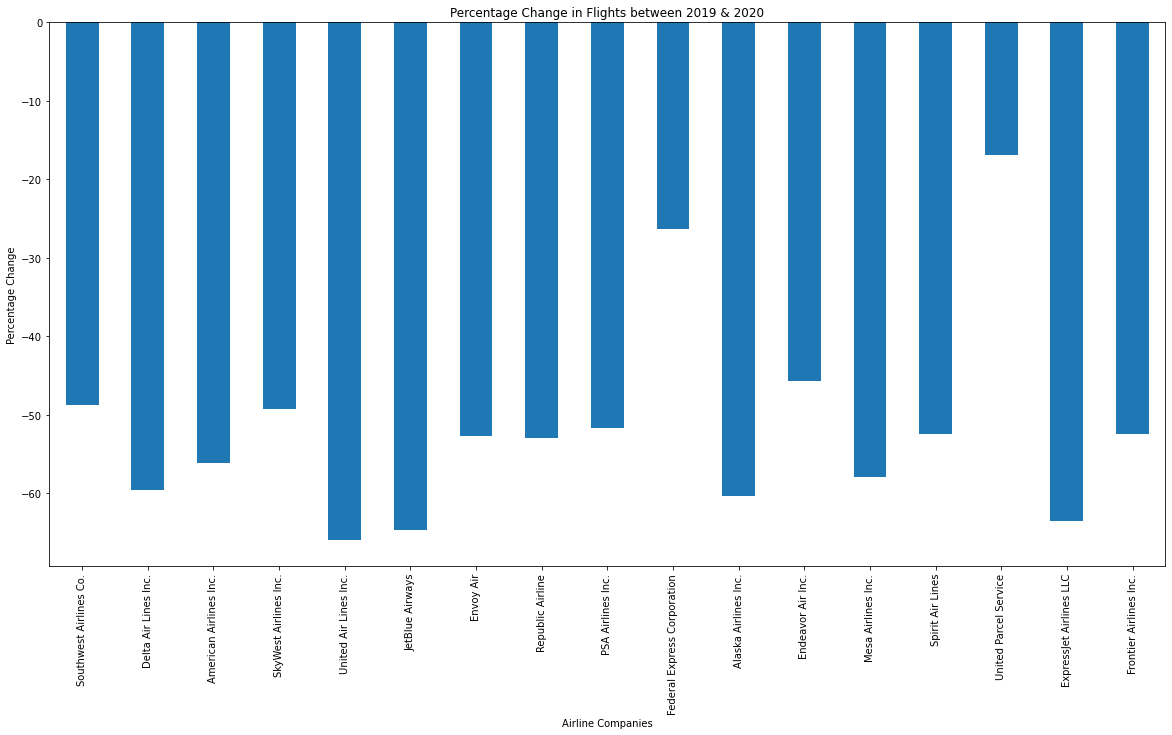

In [12]:
# Create a bar graph to show the percentage change in flights.
pc = percentage_change.plot.bar(rot=90, figsize=(20,10))

pc.set_ylabel("Percentage Change")
pc.set_title('Percentage Change in Flights between 2019 & 2020')

# plt.savefig('output_data/Percentage_Change_in_Flights_between_2019_and_2020.png')
plt.show()

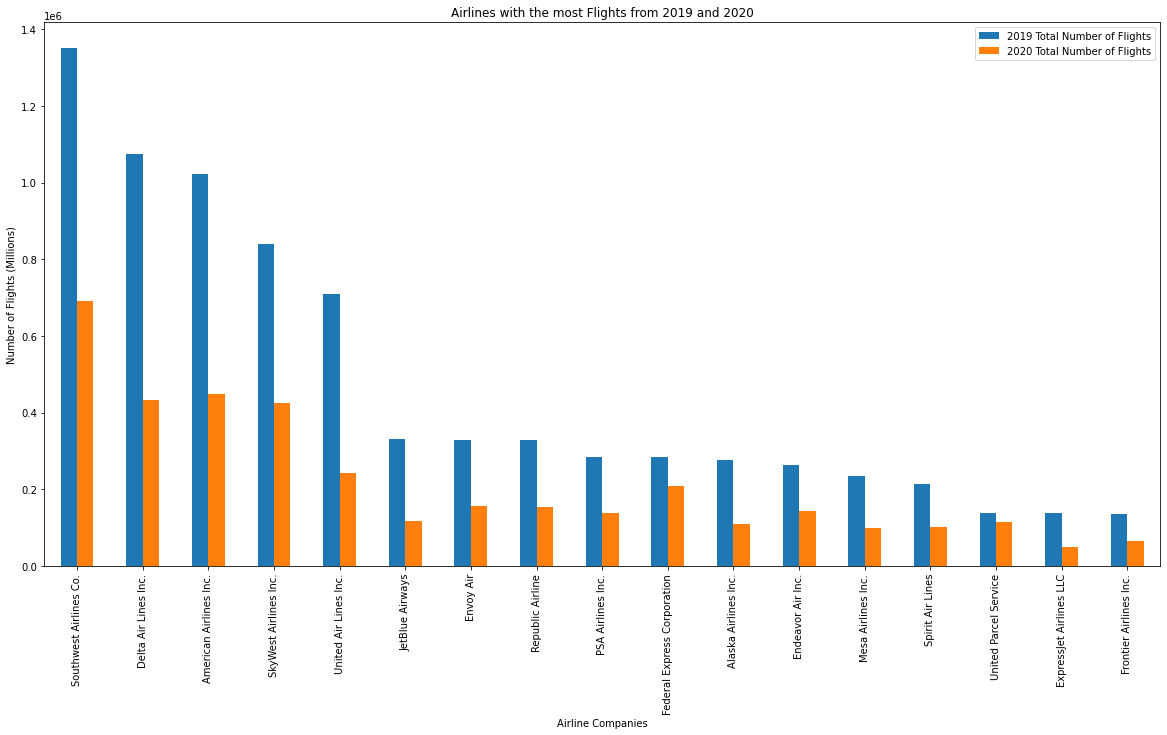

In [13]:
# Create a bar graph that shows the the number of flights taken from the top US Airline Companies in 2019 and 2020.
taf = top_airline_flights_19_20.plot.bar(rot=90, figsize=(20,10))
taf.set_ylabel("Number of Flights (Millions)")
taf.set_title('Airlines with the most Flights from 2019 and 2020')

# plt.savefig('output_data/Top_Airline_Flights_19_20.png')
plt.show()

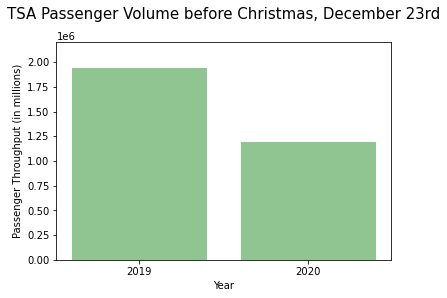

In [14]:
#Create a bar graph showing the difference in passenger count before Christmas
christmas_volumes = [1937235, 1191123]
christmas_year = [2019, 2020]
plt.bar(christmas_year, christmas_volumes, color='forestgreen', alpha=0.5, align="center")
tick_locations = [value for value in christmas_year]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,2200000)

#Label the axis
plt.title("TSA Passenger Volume before Christmas, December 23rd", fontsize=15, y=1.08)
plt.xlabel("Year")
plt.ylabel("Passenger Throughput (in millions)")

# plt.savefig("output_data/TSA Passenger Volume before Christmas.png")
plt.show()

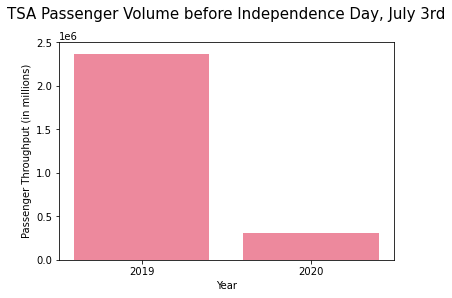

In [15]:
#Create a bar graph showing the difference in passenger count before Independence Day
independence_volumes = [2370152, 304436]
independence_year = [2019, 2020]
plt.bar(independence_year, independence_volumes, color='crimson', alpha=0.5, align="center")
tick_locations = [value for value in independence_year]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,2500000)

#Label the axis
plt.title("TSA Passenger Volume before Independence Day, July 3rd", fontsize=15, y=1.08)
plt.xlabel("Year")
plt.ylabel("Passenger Throughput (in millions)")

# plt.savefig("output_data/TSA Passenger Volume before Independece Day.png")
plt.show()

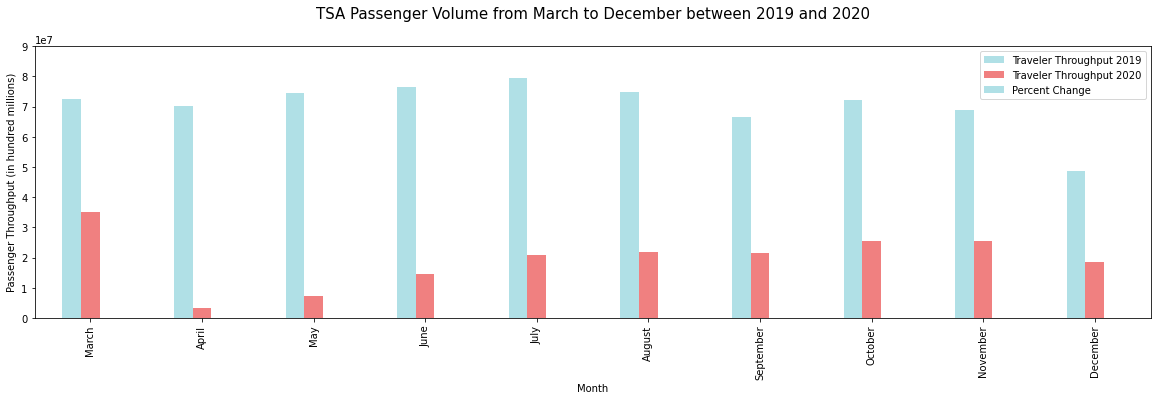

In [16]:
#Create a bar plot displaying the passenger volume between 2019 and 2020
colors = ["powderblue", "lightcoral"]
multi_plot = tsa_groupedby_month.plot(kind="bar", figsize=(20,5), color=colors)
plt.ylim(0,90000000)

#Label the axis
plt.title("TSA Passenger Volume from March to December between 2019 and 2020", fontsize=15, y=1.08)
plt.xlabel("Month")
plt.ylabel("Passenger Throughput (in hundred millions)")

# plt.savefig("output_data/TSA Passenger Volume Across All Months.png")
plt.show()

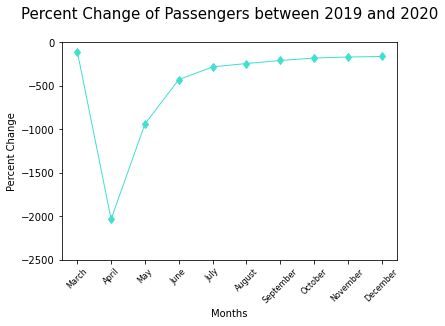

In [17]:
#Convert the percent change column from object to float so we can chart it
tsa_groupedby_month["Percent Change"] = tsa_groupedby_month["Percent Change"].astype(float)

#Create a line chart that plots the percent change over the months 
months = ["March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
pct_change_month = tsa_groupedby_month["Percent Change"]

plt.plot(months, pct_change_month, marker="d", color="turquoise", linewidth=1)
plt.title("Percent Change of Passengers between 2019 and 2020", fontsize=15, y=1.08)
plt.xlabel("Months")
plt.ylabel("Percent Change")
plt.ylim(-2500,0)
plt.xticks(rotation=45, fontsize=8)

# plt.savefig("output_data/TSA Passenger Percent Change.png")
plt.show()

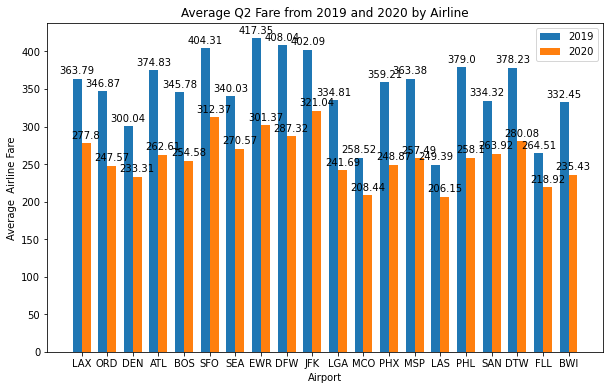

In [19]:
labels = df['Airport Code']
x = np.arange(len(labels))
width = 0.35

fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, df['Average Fare 2019'], width, label='2019')
rects2 = ax.bar(x + width/2, df['Average Fare 2020'], width, label='2020')

ax.set_ylabel('Average  Airline Fare')
ax.set_xlabel('Airport')
ax.set_title('Average Q2 Fare from 2019 and 2020 by Airline')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(9,6)

# plt.savefig('Q2 average airfare')
plt.show()

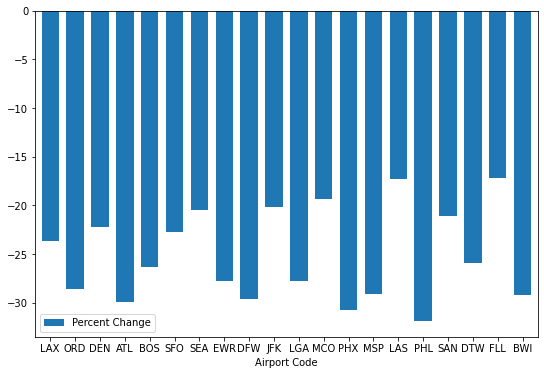

In [20]:
fig = df.plot.bar(x='Airport Code', y='Percent Change', width = 0.7, rot=0, figsize=(9,6))
ax.set_xlabel('Airport')
ax.set_ylabel('Percent Change')
ax.set_title('2nd Quarter Percent Change from 2019 to 2020')

# plt.savefig('Q2 Percent Change')
plt.show()

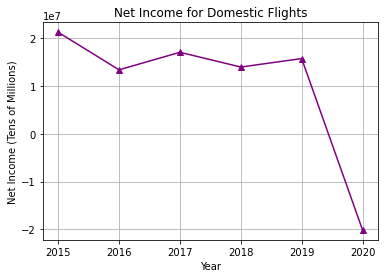

In [21]:
# Let's store the totals for domestic flights from 2015-2020 into variables for plotting

domestic_2015 = five_year_df.iloc[4,2]
domestic_2016 = five_year_df.iloc[9,2]
domestic_2017 = five_year_df.iloc[14,2]
domestic_2018 = five_year_df.iloc[19,2]
domestic_2019 = five_year_df.iloc[24,2]
domestic_2020 = five_year_df.iloc[28,2]

y1 = [domestic_2015, domestic_2016, domestic_2017, domestic_2018,
                domestic_2019, domestic_2020]

x = ['2015','2016','2017','2018','2019','2020']

plt.plot(x, y1, linewidth=1.5, color='purple', marker='^')
plt.xlabel('Year')
plt.ylabel('Net Income (Tens of Millions)')
plt.title('Net Income for Domestic Flights')
plt.grid (b=True,which="major",axis="both")

# plt.savefig("output_data/Net_Income_Domestic.png")

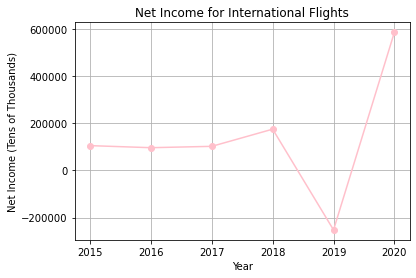

In [22]:
# Let's store the totals for international flights from 2015-2020 into variables for plotting

international_2015 = five_year_df.iloc[4,6]
international_2016 = five_year_df.iloc[9,6]
international_2017 = five_year_df.iloc[14,6]
international_2018 = five_year_df.iloc[19,6]
international_2019 = five_year_df.iloc[24,6]
international_2020 = five_year_df.iloc[28,6]

y2 = [international_2015, international_2016, international_2017, 
      international_2018, international_2019, international_2020]

x = ['2015','2016','2017','2018','2019','2020']

plt.plot(x, y2, linewidth=1.5, color='pink', marker='o')
plt.xlabel('Year')
plt.ylabel('Net Income (Tens of Thousands)')
plt.title('Net Income for International Flights')
plt.grid (b=True,which="major",axis="both")

# plt.savefig("output_data/Net_Income_International.png")